In [2]:
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


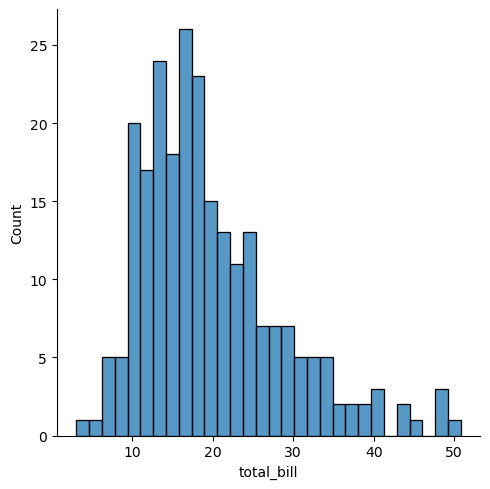

In [10]:
sns.displot(tips['total_bill'], kde = False, bins = 30)

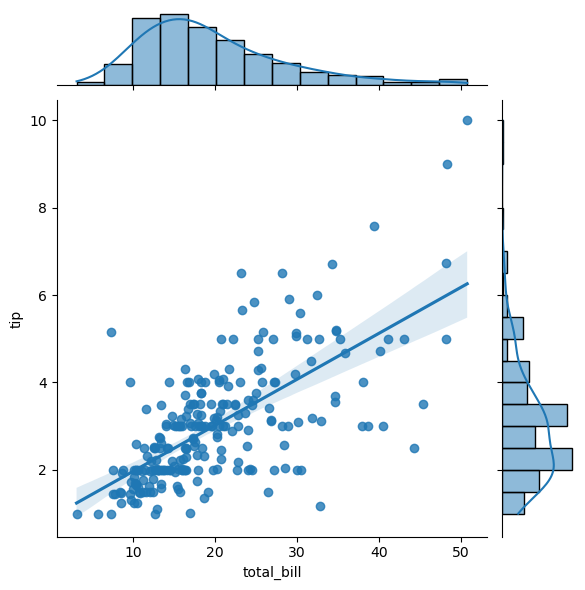

In [13]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind = 'reg')

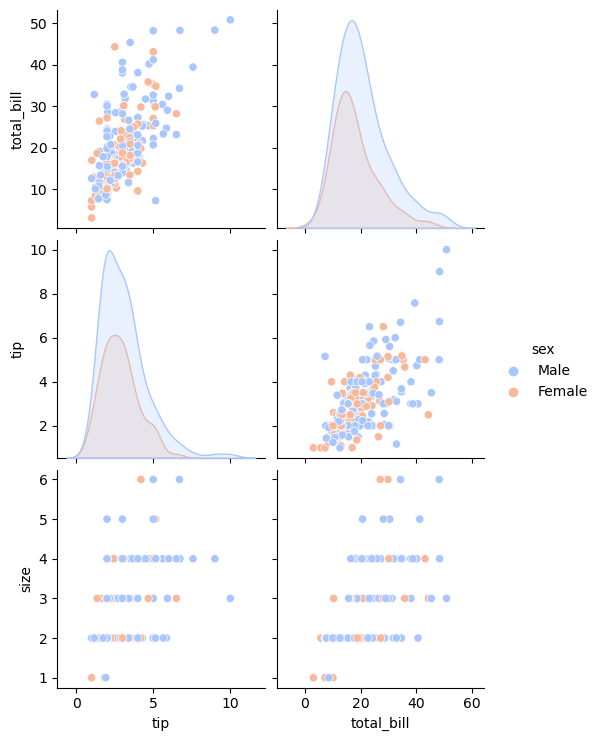

In [6]:
sns.pairplot(tips,x_vars =['tip', 'total_bill'],hue='sex',palette='coolwarm')

<Axes: xlabel='total_bill'>

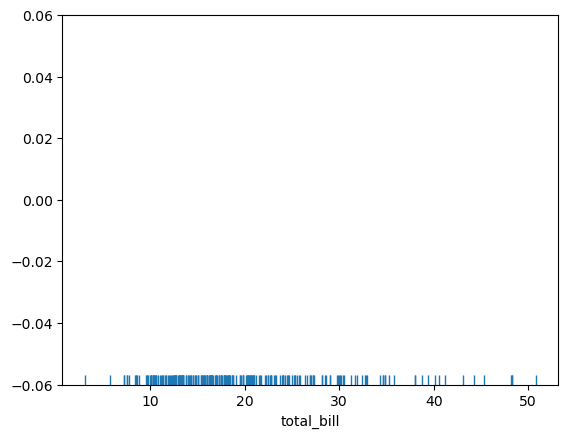

In [17]:
sns.rugplot(tips['total_bill'])

(0.0, 1.0)

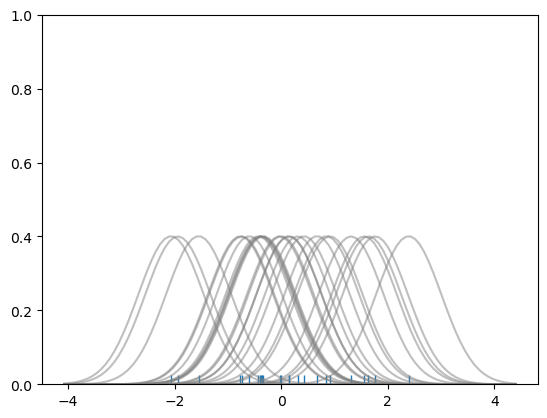

In [37]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

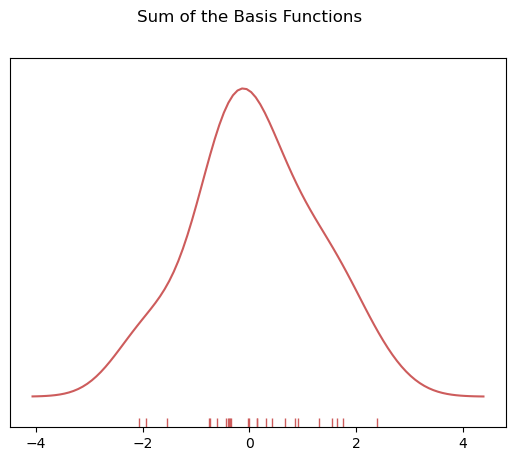

In [38]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='sex', ylabel='total_bill'>

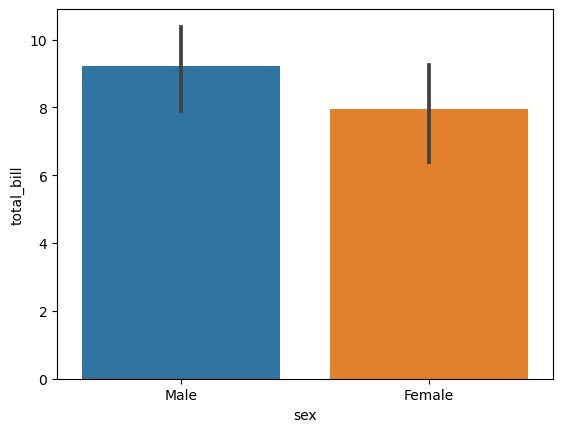

In [8]:
import numpy as np
sns.barplot(x='sex', y='total_bill', data = tips,estimator=np.std)

In [9]:
# counting number of occurence

<Axes: xlabel='sex', ylabel='count'>

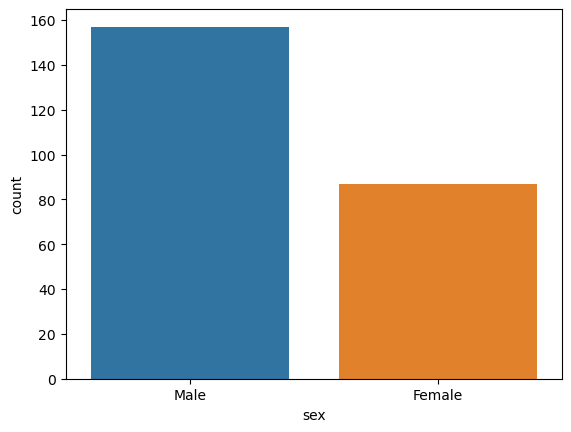

In [10]:
sns.countplot(x='sex', data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

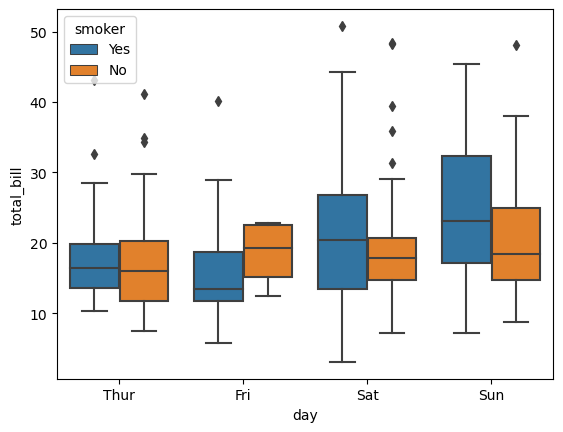

In [12]:
sns.boxplot(x='day', y='total_bill', data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

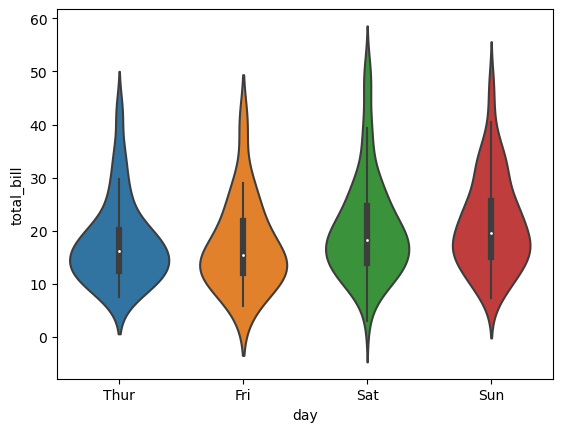

In [13]:
sns.violinplot(x='day', y='total_bill',data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

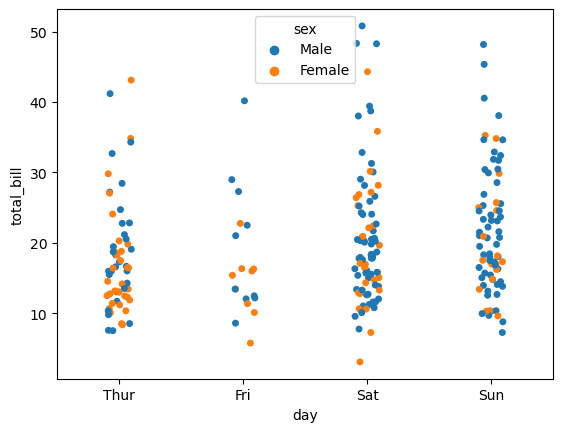

In [18]:
sns.stripplot(x='day', y='total_bill', data = tips, jitter= True, hue='sex')

<Axes: xlabel='day', ylabel='total_bill'>

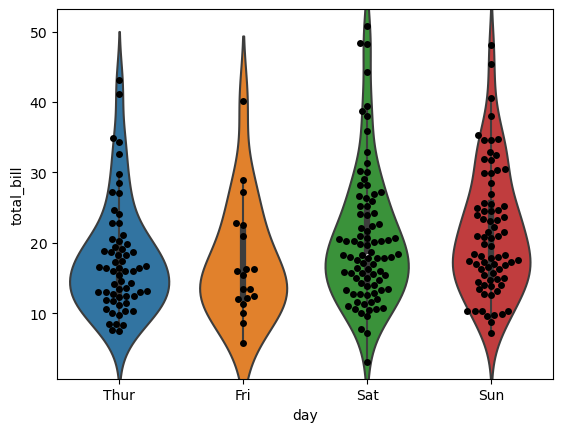

In [20]:
sns.violinplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, color ='black')

In [14]:
flights = sns.load_dataset('flights')
flights.head(10)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
5,1949,Jun,135
6,1949,Jul,148
7,1949,Aug,148
8,1949,Sep,136
9,1949,Oct,119


In [7]:
tc = tips.corr()

/tmp/ipykernel_92521/1022518147.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tc = tips.corr()


<Axes: >

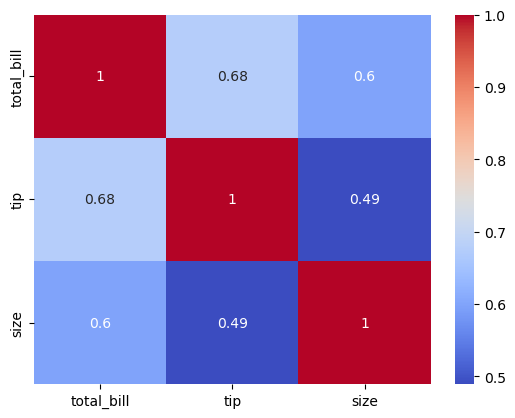

In [10]:
sns.heatmap(tc, annot = True, cmap='coolwarm')

In [19]:
fp = flights.pivot_table(index='month', columns='year', values='passengers')

<Axes: xlabel='year', ylabel='month'>

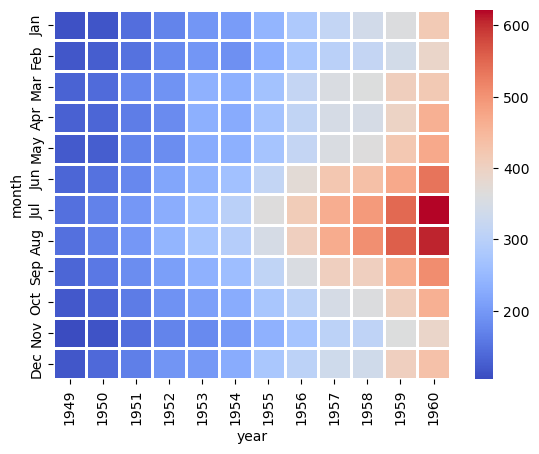

In [23]:
sns.heatmap(fp,cmap='coolwarm',linecolor='white', linewidth=1)

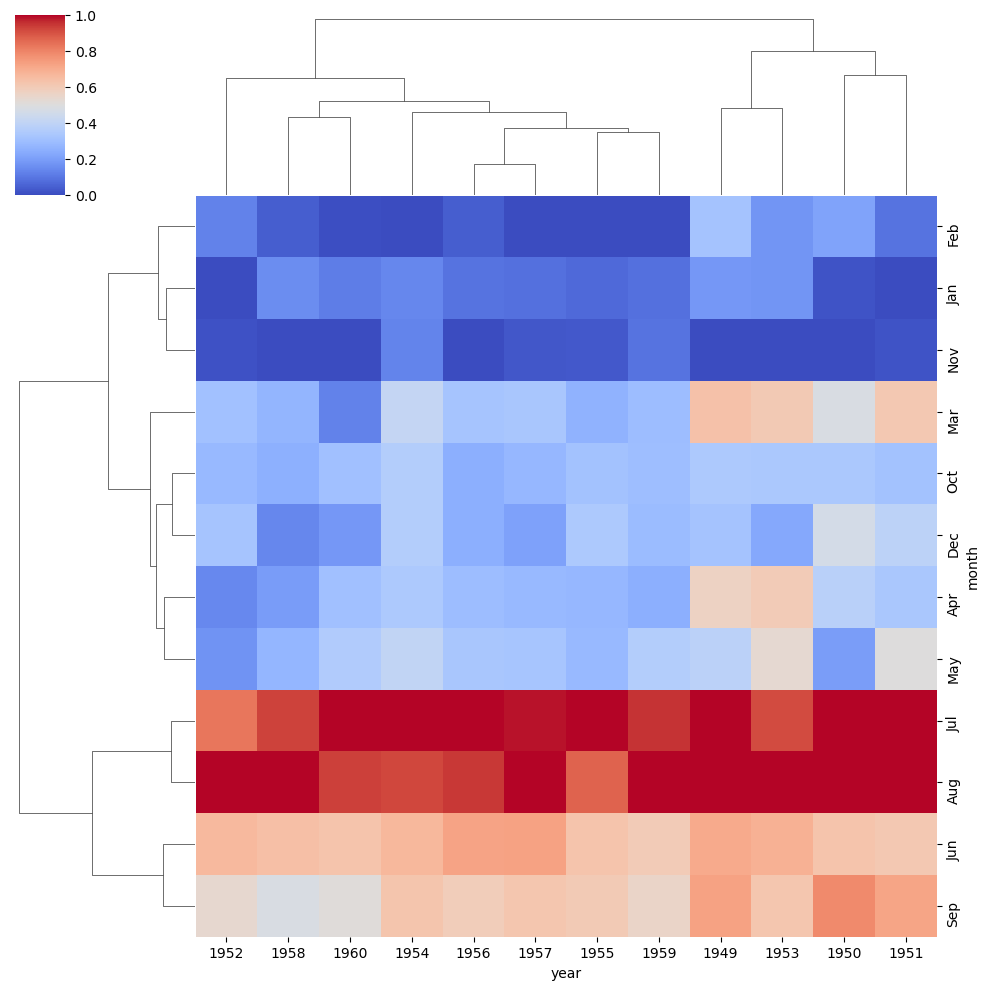

In [26]:
sns.clustermap(fp,cmap='coolwarm',standard_scale = 1)

In [27]:
iris = sns.load_dataset('iris')

In [28]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


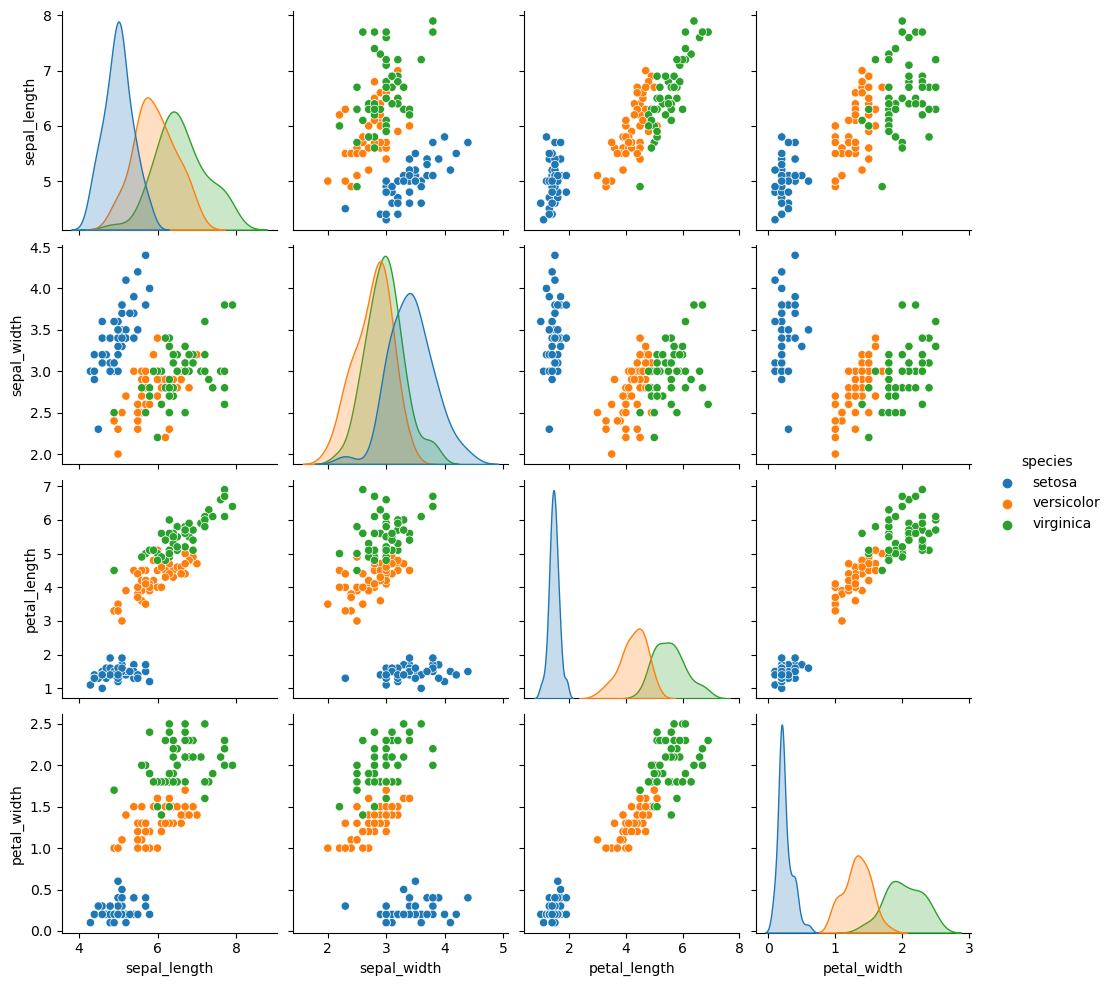

In [30]:
sns.pairplot(iris,hue='species')

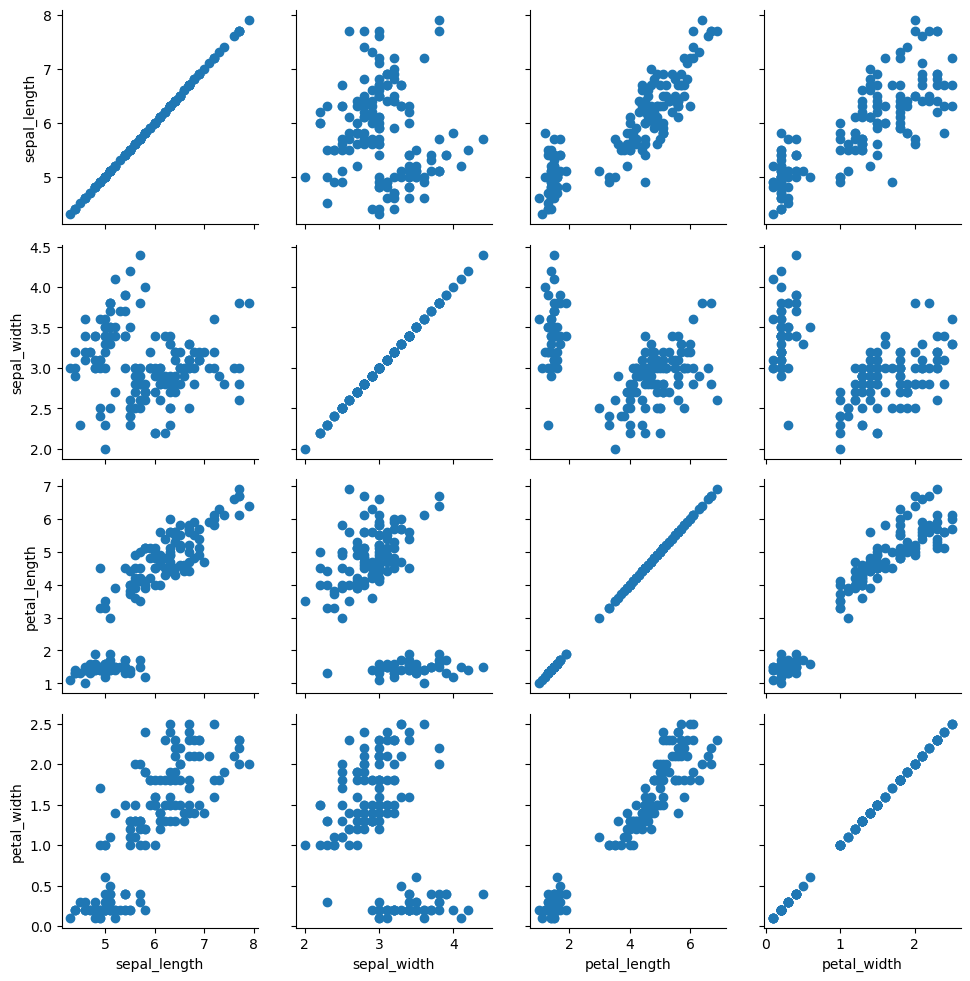

In [33]:
import matplotlib.pyplot as plt
g = sns.PairGrid(iris)
g.map(plt.scatter)

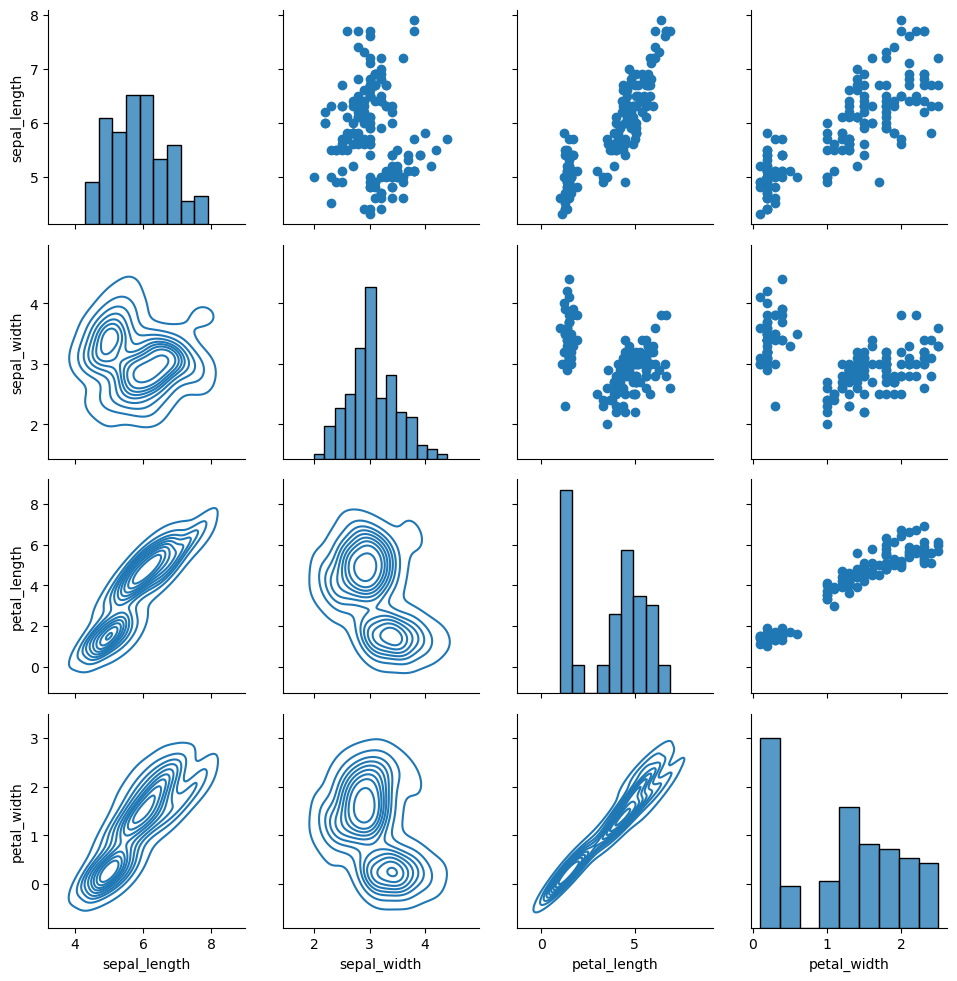

In [39]:
g = sns.PairGrid(iris)
g.map_diag(sns.histplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

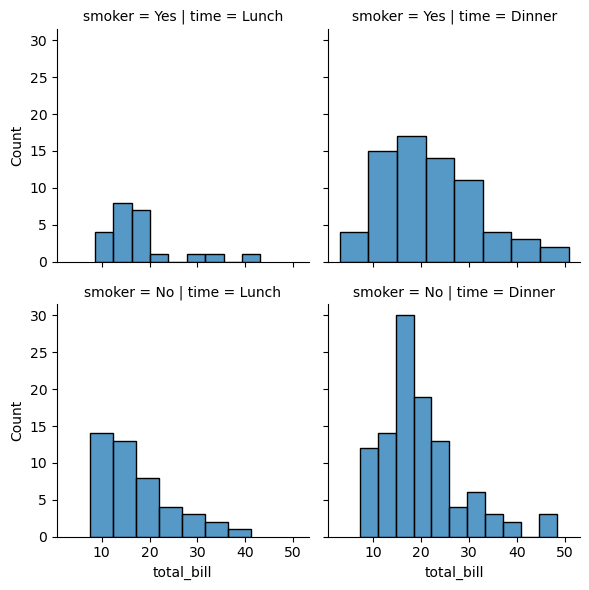

In [42]:
g = sns.FacetGrid(data = tips, col='time', row='smoker')
g.map(sns.histplot,'total_bill')

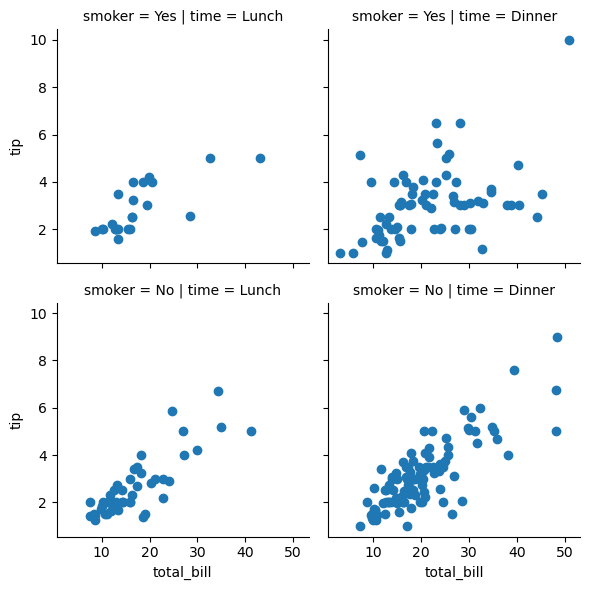

In [45]:
g = sns.FacetGrid(data = tips, col='time', row='smoker')
g.map(plt.scatter, 'total_bill','tip')

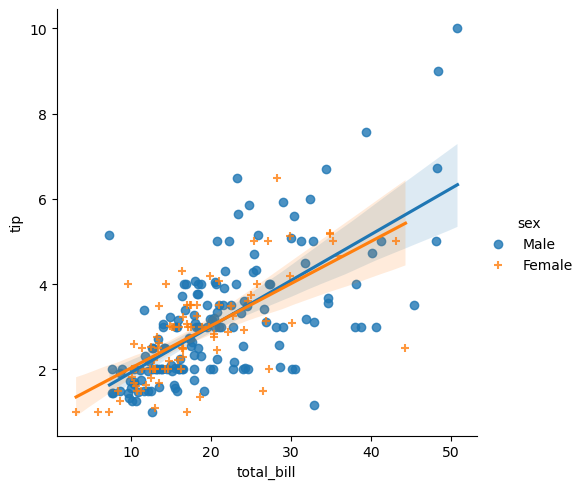

In [49]:
sns.lmplot(x='total_bill', y='tip', data= tips, hue='sex', markers=['o','+'])

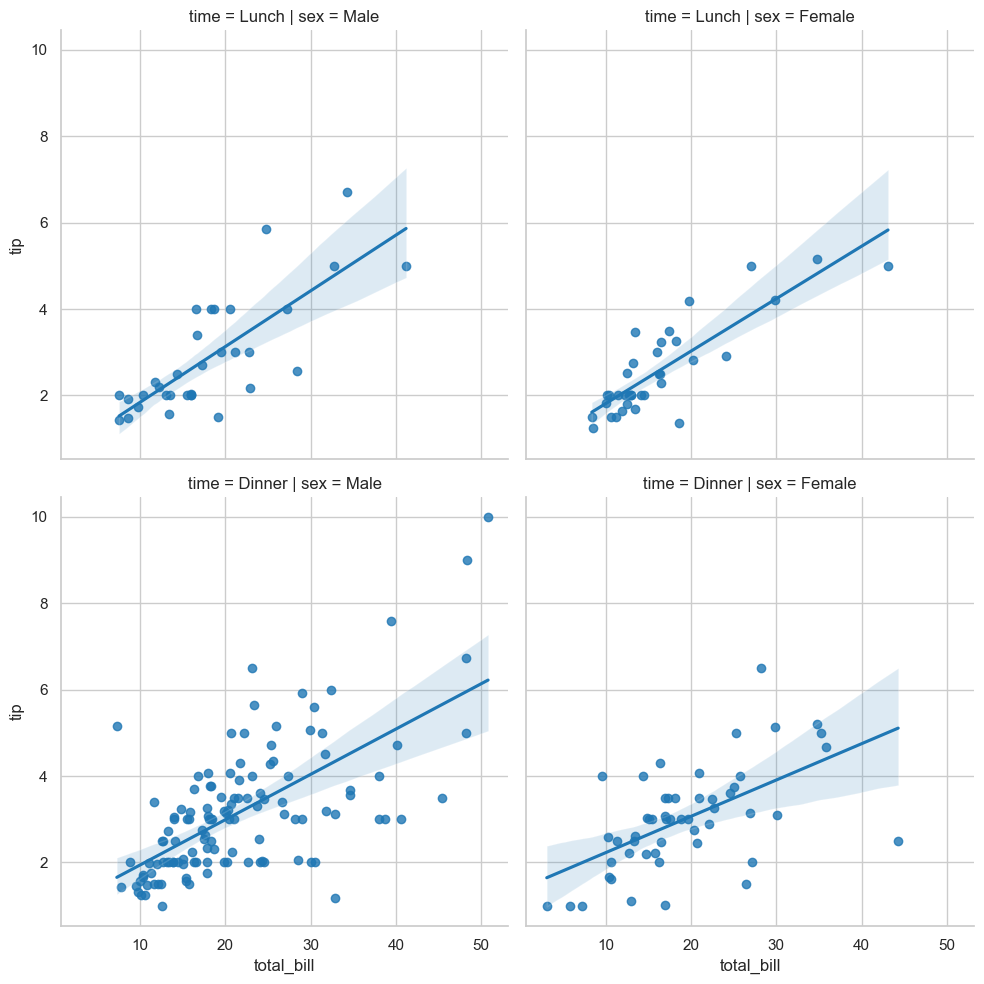

In [58]:
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.lmplot(x='total_bill', y='tip', data= tips, col = 'sex', row = 'time', aspect=1)
